In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Load the dataset
zoo_data = pd.read_csv('Zoo.csv')

In [ ]:
# Display basic information
print(zoo_data.info())
print(zoo_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
             hair 

In [ ]:
# Check for missing values
print("Missing values:\n", zoo_data.isnull().sum())

Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


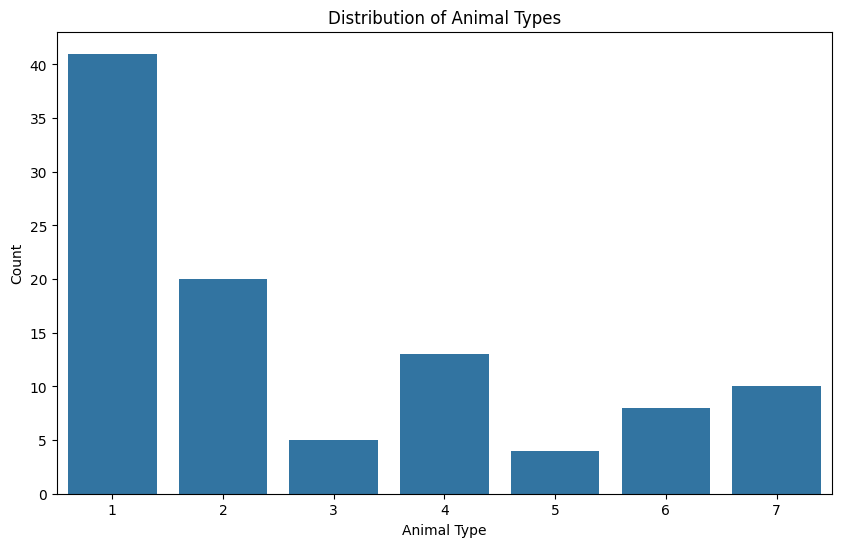

In [ ]:
# Visualize the distribution of animal types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=zoo_data)
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

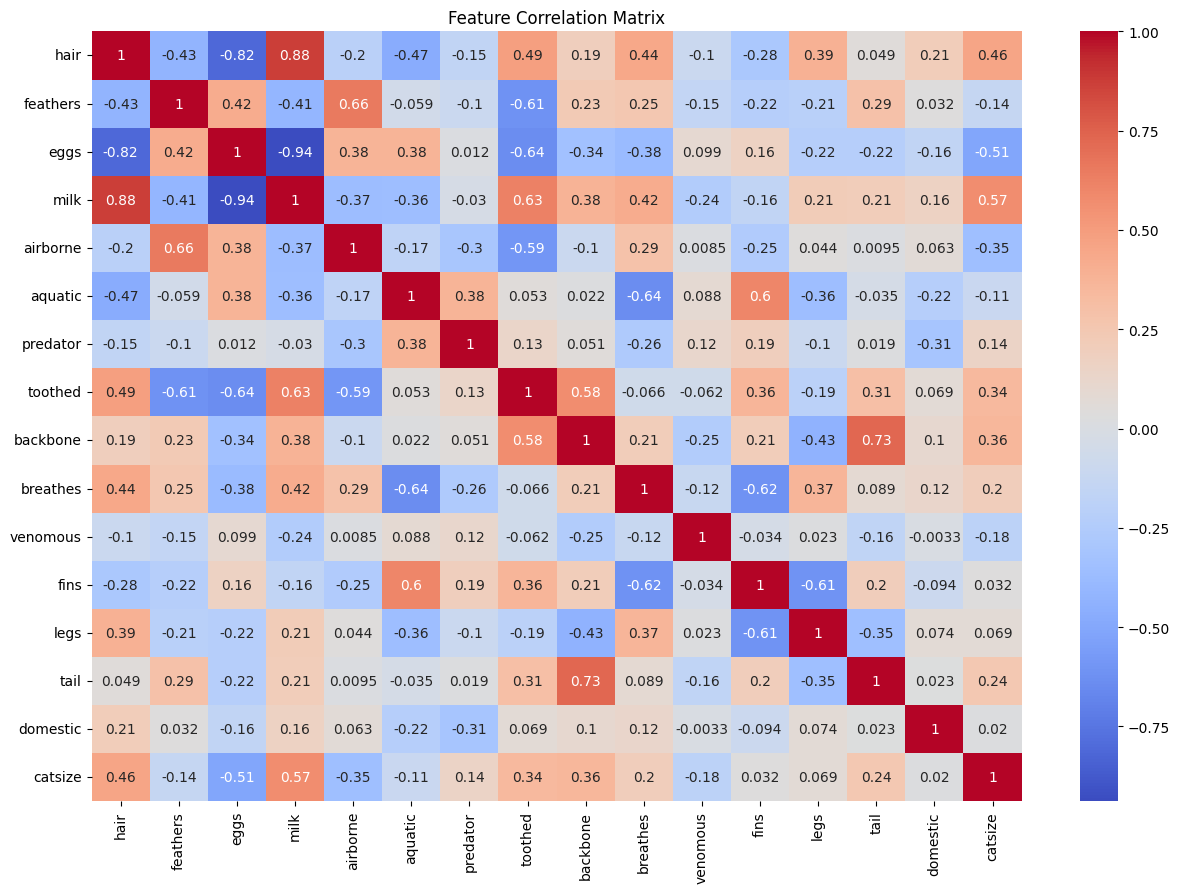

In [ ]:
# Visualize correlation between features
plt.figure(figsize=(15, 10))
corr_matrix = zoo_data.iloc[:, 1:-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

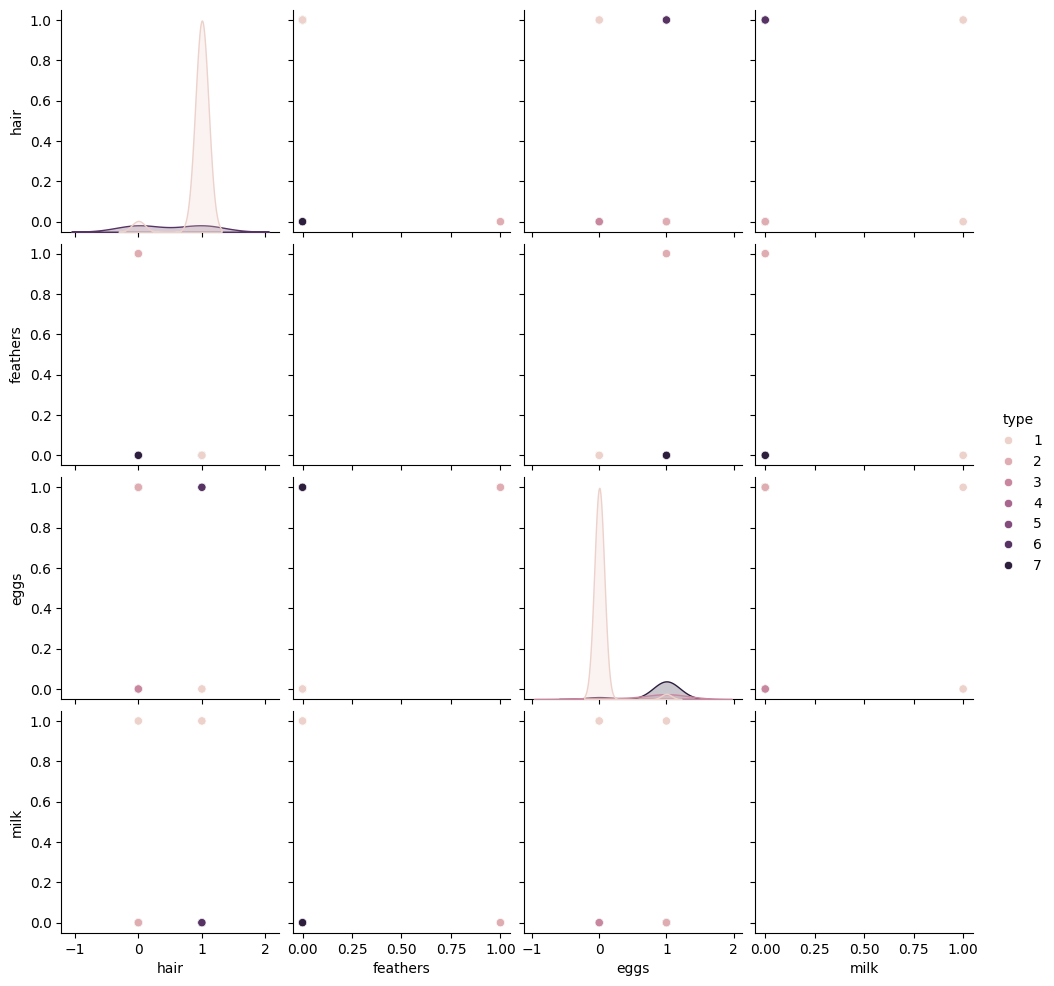

In [ ]:
# Pairplot for some selected features
sns.pairplot(zoo_data[['hair', 'feathers', 'eggs', 'milk', 'type']], hue='type')
plt.show()

**Observations:**

The dataset contains 101 animals with 17 features (16 binary features + 1 numeric feature for legs)

There are no missing values in the dataset

The target variable 'type' has 7 classes (1-7)

Some features are highly correlated (e.g., milk and hair have high positive correlation)

The dataset is imbalanced with some animal types having very few examples

## **Data Preprocessing**

In [ ]:
# Check for duplicates
print("Duplicate rows:", zoo_data.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Remove the animal name column as it's not useful for classification
zoo_data = zoo_data.drop('animal name', axis=1)

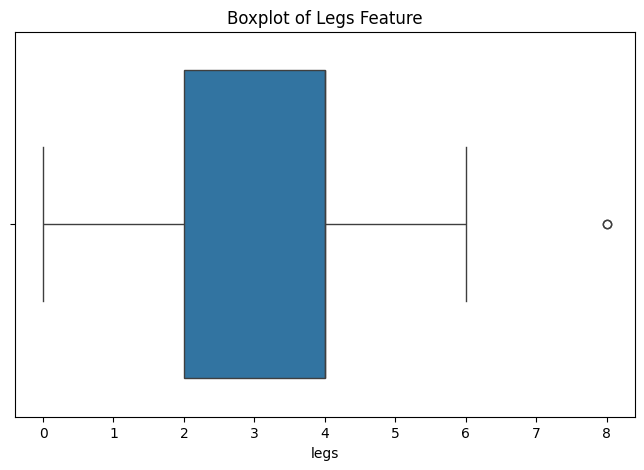

In [ ]:
# Check for outliers in the 'legs' feature
plt.figure(figsize=(8, 5))
sns.boxplot(x=zoo_data['legs'])
plt.title('Boxplot of Legs Feature')
plt.show()

In [ ]:
# Handle outliers in 'legs' - we'll cap extreme values
zoo_data['legs'] = np.where(zoo_data['legs'] > 6, 6, zoo_data['legs'])

In [ ]:
# Standardize the 'legs' feature
scaler = StandardScaler()
zoo_data['legs'] = scaler.fit_transform(zoo_data[['legs']])

## **Train-Test Split**

In [ ]:
# Split into features and target
X = zoo_data.drop('type', axis=1)
y = zoo_data['type']

# Split into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (80, 16)
Testing set size: (21, 16)


## **Implement KNN Algorithm**

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the model
knn.fit(X_train, y_train)

# Make predictions on test set
y_pred = knn.predict(X_test)

## **Choosing K and Distance Metric**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_neighbors': range(1, 15),
              'metric': ['euclidean', 'manhattan', 'minkowski']}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 15)})

In [ ]:
# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Best cross-validation score: 0.9375


In [ ]:
# Use best parameters
best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']


In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

## **Model Evaluation**

In [ ]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



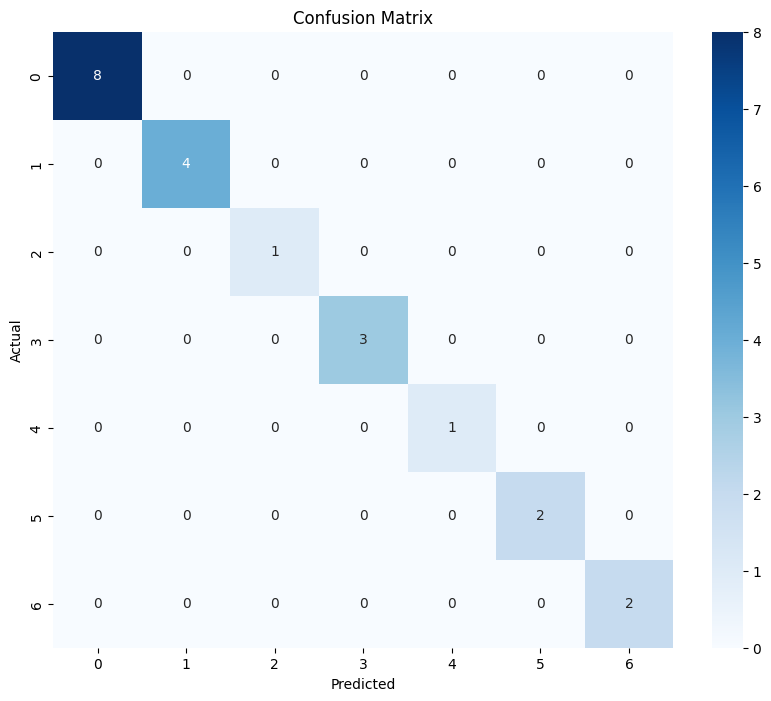

In [ ]:
# Confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


## **Visualizing Decision Boundaries**

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Train KNN on reduced data
knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

/usr/local/lib/python3.11/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


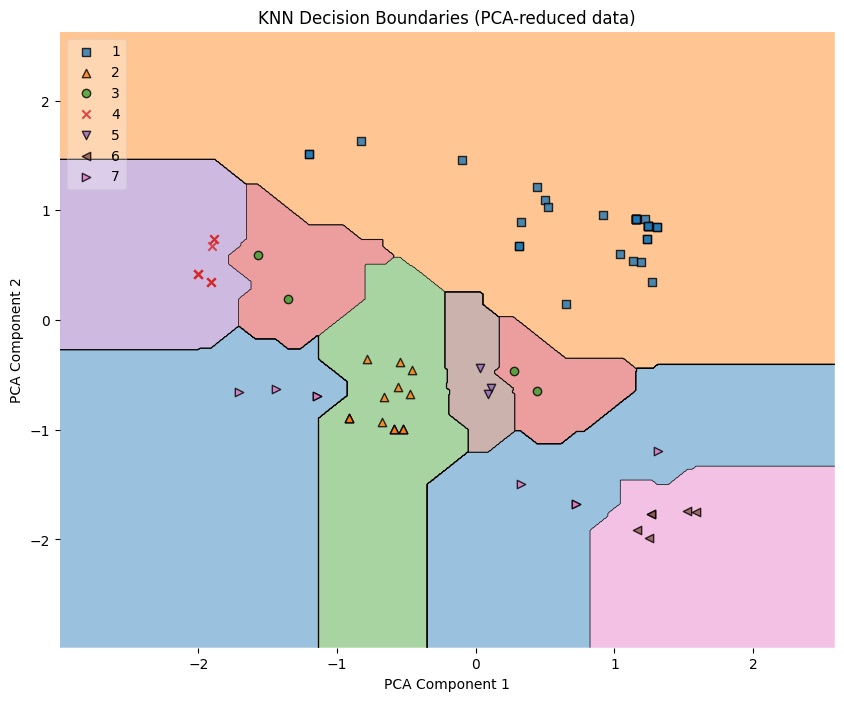

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train_pca, y_train.values, clf=knn_pca, legend=2)
plt.title('KNN Decision Boundaries (PCA-reduced data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**n_neighbors:** The number of neighbors to consider (K value)

**metric:** The distance metric to use (e.g., Euclidean, Manhattan, Minkowski)

**weights: **Whether to use uniform weights or distance-based weights

**algorithm: **The algorithm used to compute nearest neighbors (auto, ball_tree, kd_tree, brute)

**leaf_size:** Affects the speed of tree-based algorithms

**p:** Power parameter for Minkowski metric (p=1 Manhattan, p=2 Euclidean)

**Euclidean distance:** The straight-line distance between points (default)

**Manhattan distance:** The sum of absolute differences between coordinates

**Minkowski distance:** A generalization of Euclidean and Manhattan distances

**Chebyshev distance:** The maximum coordinate difference

**Hamming distance**: For categorical data (count of differing features)

**Cosine similarity:** Measures the angle between vectors

**Jaccard distance:** For binary data (ratio of differing features to total features)